In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)

In [130]:
df_array = []
def add_chart(fileName, displayName):
    path = './data/'
    df = pd.read_csv(f'{path}{fileName}')
    df.name = displayName
    df_array.append(df)    
type = 'short' # short, long, or both
if(type == 'short' or type == 'both'):
    max_range = 400
    add_chart('Range Chart - Firearm (Other) - Round (45 ACP).csv', '45 ACP')
    add_chart('Range Chart - Firearm (Other) - Round (9mm).csv', '9mm')
    add_chart('Range Chart - Firearm (AR15 - 300 BLK - 10.5") - Round (190 SUB-X, 11.6 Accurate 1680).csv', '300 BLK - 10.5" - 190gr SUB-X')
    add_chart('Range Chart - Firearm (AR15 - 300 BLK - 10.5") - Round (110 V-Max).csv', '300 BLK - 10.5" - 110gr V-MAX')
    add_chart('Range Chart - Firearm (Other) - Round (30-30).csv', '30-30 Win - 20" - 150gr')
    add_chart('Range Chart - Firearm (AR15 - 5.56 - 12") - Round (77 SMK, 24.5 Varget).csv', '5.56 Nato - 12" - 77gr SMK')
if(type == 'long' or type == 'both'):
    max_range = 1500
    add_chart('Range Chart - Firearm (AR15 - 5.56 - 16") - Round (77 SMK, 24.5 Varget).csv', '5.56 Nato - 16" - 77gr SMK')
    add_chart('Range Chart - Firearm (AR15 - 5.56 - 20") - Round (77 SMK, 24.5 Varget).csv', '5.56 Nato - 20" - 77gr SMK')
    add_chart('Range Chart - Firearm (AR10 OBR - 308 - 20") - Round (175 SMK, 43.5 Varget).csv', '308 Win - 20" - 175gr SMK')
    add_chart('Range Chart - Firearm (Other) - Round (6.5 Grendal).csv', '6.5 Grendal - 20" - 125gr')
    add_chart('Range Chart - Firearm (Other) - Round (6mm ARC ELD-X).csv', '6mm ARC - 20" - 103gr ELD-X')
    add_chart('Range Chart - Firearm (Other) - Round (300 Win Mag).csv', '300 Win Mag - 24" - 190gr SMK')
df_array[0].head()

,rangeMeters,rangeYards,velocityFPS,energyFtLbs,timeSeconds,dropInches,verticalPositionInches,crossWindDriftInches,leadInches,slantDegrees,verticalPositionMil,verticalPositionMoA,verticalPositionIPHY,crossWindDriftMil,crossWindDriftMoA,crossWindDriftIPHY,leadMil,leadMoA,leadIPHY,slantDropInches,slantMil,slantMoA,slantIPHY
0,0.9144,1,849.315163,368.303209,0.003476,-0.002332,1.861507,-0.009336,0.183558,45,51.708520,177.760797,186.150672,-0.259332,-0.891517,-0.933594,5.098828,17.528481,18.355782,-0.000683,-0.018977,-0.065237,-0.068316
1,1.8288,2,848.631905,367.710861,0.007014,-0.009495,1.727843,-0.007903,0.370346,45,23.997824,82.498441,86.392165,-0.109764,-0.377340,-0.395149,5.143699,17.682734,18.517315,-0.002781,-0.038624,-0.132781,-0.139048
2,2.7432,3,847.950208,367.120342,0.010603,-0.021696,1.599219,0.002514,0.559830,45,14.807582,50.904717,53.307295,0.023275,0.080015,0.083792,5.183610,17.819940,18.660998,-0.006355,-0.058839,-0.202275,-0.211821
3,3.6576,4,847.271199,366.532623,0.014177,-0.038791,1.475488,0.010439,0.748566,45,10.246444,35.224679,36.887198,0.072494,0.249215,0.260977,5.198376,17.870700,18.714153,-0.011362,-0.078900,-0.271238,-0.284040
4,4.5720,5,846.592190,365.945375,0.017675,-0.060293,1.356165,0.004870,0.933254,45,7.534248,25.900836,27.123292,0.027055,0.093008,0.097398,5.184744,17.823838,18.665080,-0.017660,-0.098108,-0.337272,-0.353190


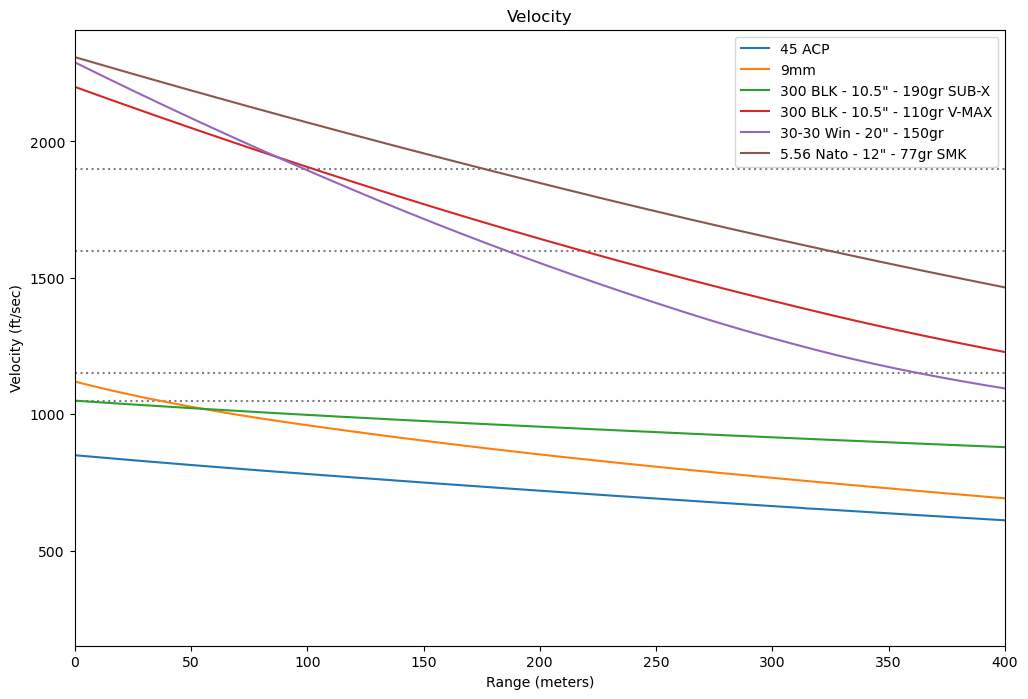

In [131]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.axhline(y=1900, color='gray', linestyle=':') # Fragmentation velocity
plt.axhline(y=1600, color='gray', linestyle=':') # Expansion velocity
plt.axhline(y=1150, color='gray', linestyle=':') # Trans-Sonic
plt.axhline(y=1050, color='gray', linestyle=':') # Sub-Sonic
plt.title("Velocity")
plt.xlabel("Range (meters)")
plt.ylabel("Velocity (ft/sec)")
for i, df in enumerate(df_array):
    ax.plot(df['rangeMeters'], df['velocityFPS'], label=df.name, color=f'C{i}')
plt.xlim(left=0, right=max_range)
plt.legend()
plt.show()

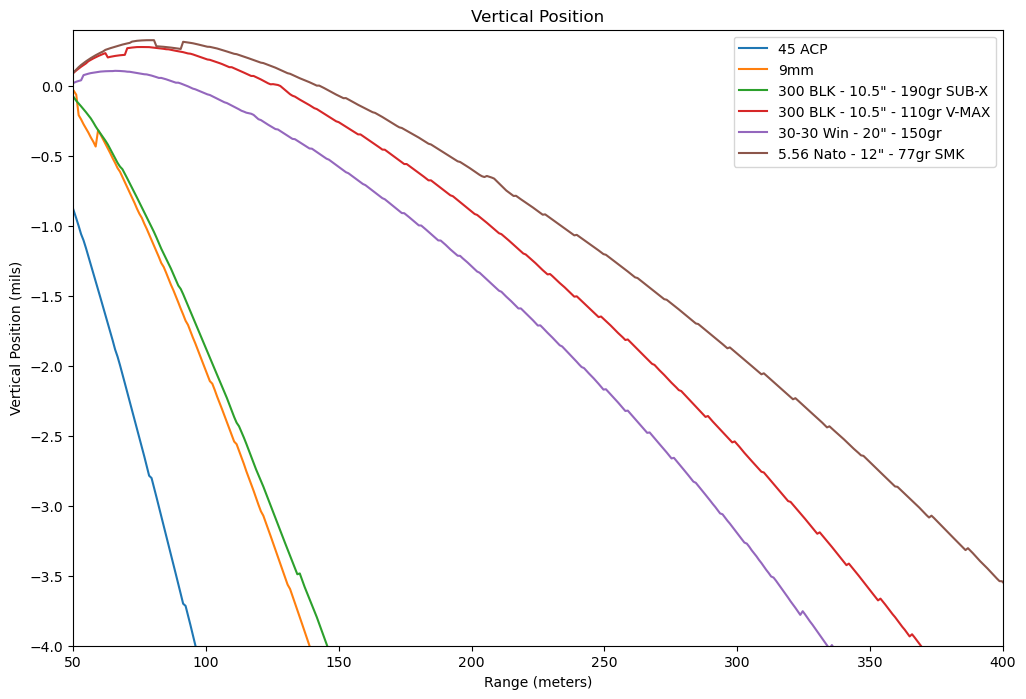

In [132]:
from scipy.interpolate import make_interp_spline, BSpline

fig, ax = plt.subplots(figsize=(12, 8))
plt.axhline(y=-30, color='gray', linestyle=':') # Limit of most scope adjustments
plt.title("Vertical Position")
plt.xlabel("Range (meters)")
plt.ylabel("Vertical Position (mils)")
for i, df in enumerate(df_array):
    ax.plot(df['rangeMeters'], -df['verticalPositionMil'], label=df.name, color=f'C{i}')
plt.xlim(left=50, right=max_range)
if(type == 'short'):
    plt.ylim(bottom=-4, top=0.4)
else:
    plt.ylim(bottom=-30, top=0.4)
plt.legend()
plt.show()

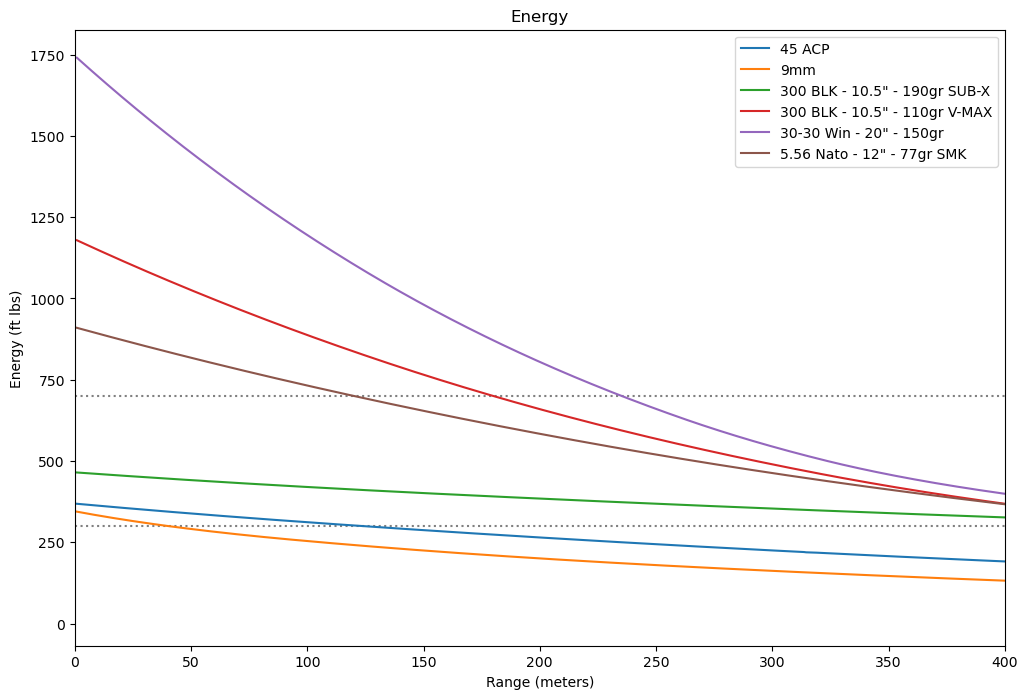

In [133]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Energy")
plt.xlabel("Range (meters)")
plt.ylabel("Energy (ft lbs)")
plt.axhline(y=300, color='gray', linestyle=':') # Self Defense
plt.axhline(y=700, color='gray', linestyle=':') # Deer
for i, df in enumerate(df_array):
    ax.plot(df['rangeMeters'], df['energyFtLbs'], label=df.name, color=f'C{i}')
plt.xlim(left=0, right=max_range)
plt.legend()
plt.show()